

# Projet 7 : Implémentez un modèle de scoring : LightGBM

L'objectif de ce notebook est d'évaluer notre classification avec LightGBM

[LightGBM](https://datascience.eu/fr/apprentissage-automatique/quest-ce-que-la-gbm-legere/) est un algorithme de machine learning basé sur le Gradient Boosting Machine (GBM), il est rapide, distribué, avec de grandes performances et repose sur des arbres de décisions.


Paramètres : 

- (max_depth) :  contrôle la distance maximale entre le nœud racine de chaque arbre et un nœud feuille. Diminuer max_depth réduit le temps d'entraînement. 
- (num_leaves):  définit le nombre maximal de nœuds par arbre. Diminuer num_leaves réduit le temps de entraînement.

## Importation des modules

In [ ]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 7.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
import numpy as np 
import pandas as pd

## PLOT
import matplotlib.pyplot as plt
import seaborn as sns


## Modelisation
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import lightgbm as lgb

## Scores
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  make_scorer



## Threshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Export
import pickle

## Warning
import warnings

In [ ]:
warnings.filterwarnings("ignore")

##  Importation de données

In [ ]:
use_colab = True 

if use_colab:
    from google.colab import drive
    drive.mount('/content/drive')
    PATH ='/content/drive/MyDrive/'
else:
    PATH ='/data/'

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv(PATH + 'df_final.csv')

In [ ]:
X_train_smtomek = pd.read_csv(PATH+"X_train_smtomek_bis.csv")
y_train_smtomek = pd.read_csv(PATH+"y_train_smtomek_bis.csv")

In [ ]:
X_test_smtomek =  pd.read_csv(PATH+"X_test_smtomek_bis.csv")
y_test_smtomek = pd.read_csv(PATH+"y_test_smtomek_bis.csv")

In [ ]:
X_test_smtomek

,0,1,2,3,4,5,6,7
0,0.0,0.0,-0.480901,0.000000,-0.70,-0.5,0.0,1.0
1,1.0,1.0,-0.852713,-1.704887,-0.13,0.0,1.0,1.0
2,0.0,1.0,-0.029725,-0.004260,0.37,-0.5,0.0,1.0
3,0.0,0.0,-0.330005,-1.624125,0.12,0.0,0.0,1.0
4,-1.0,0.0,0.000000,0.000000,-0.13,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...
123000,3.0,3.0,-0.581628,0.591075,0.87,0.5,0.0,0.0
123001,1.0,2.0,0.000000,-3.272938,-0.33,0.0,1.0,3.0
123002,0.0,0.0,-0.104102,0.000000,-0.13,-0.5,0.0,0.0
123003,0.0,0.0,1.751525,0.000000,-0.63,-0.5,0.0,1.0


## Mise en place du modèle

In [ ]:
from sklearn.model_selection import KFold, StratifiedKFold
from lightgbm import LGBMClassifier

In [ ]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

In [ ]:
lgb = LGBMClassifier(random_state=0,scale_pos_weight=1.1)
lgb.fit(X_train_smtomek, y_train_smtomek)

LGBMClassifier(random_state=0, scale_pos_weight=1.1)

              precision    recall  f1-score   support

           0       0.94      0.57      0.71    113121
           1       0.10      0.57      0.18      9884

    accuracy                           0.57    123005
   macro avg       0.52      0.57      0.44    123005
weighted avg       0.87      0.57      0.67    123005



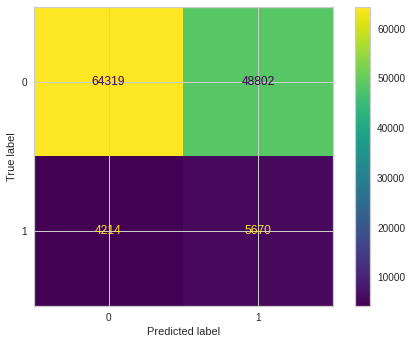

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = lgb.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb.classes_).plot()
plt.show()

In [ ]:
grid_params = { 
   'learning_rate': [0.05],
    'num_leaves': [90,200],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'max_depth' : [5,6,7,8],
    'random_state' : [501], 
    'colsample_bytree' : [0.5,0.7],
    'subsample' : [0.5,0.7],
    'min_split_gain' : [0.01],
    'min_data_in_leaf':[10]}

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=1,
                          
                          pos_label=0)
#'class_weight': [{0: 0.47 ,  1: 0.53}]

                 
#grid_params = { 'scale_pos_weight': np.arange(0.1,1,1.0)}
#grid_params = { 'scale_pos_weight': 1.1}

lgb_fOne = RandomizedSearchCV(lgb,
                          grid_params,verbose=1,cv=10,scoring = fone_scorer,n_jobs = 5,n_iter=10)
lgb_fOne.fit(X_train_smtomek, y_train_smtomek , eval_metric = 'aucpr')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=LGBMClassifier(random_state=0,
                                            scale_pos_weight=1.1),
                   n_jobs=5,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   scoring=make_scorer(fbeta_score, beta=1, pos_label=0),
                   verbose=1)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72    113121
           1       0.11      0.57      0.18      9884

    accuracy                           0.58    123005
   macro avg       0.52      0.57      0.45    123005
weighted avg       0.87      0.58      0.67    123005



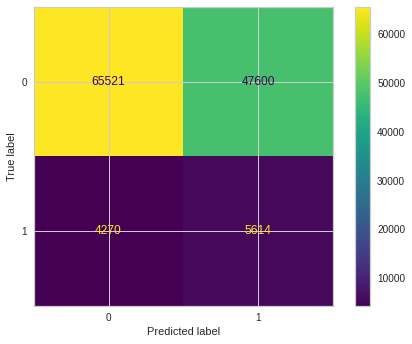

In [ ]:
y_pred = lgb_fOne.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb_fOne.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb_fOne.classes_).plot()
plt.show()

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import GridSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=2,
                          greater_is_better = True,
                          pos_label=0)

In [ ]:
from sklearn.metrics import fbeta_score
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

fone_scorer = make_scorer(fbeta_score,
                          beta=1,
                          
                          pos_label=0)
#'class_weight': [{0: 0.47 ,  1: 0.53}]

                 
#grid_params = { 'scale_pos_weight': np.arange(0.1,1,1.0)}
#grid_params = { 'scale_pos_weight': 1.1}

lgb_fOne = RandomizedSearchCV(lgb,
                          grid_params,verbose=1,cv=10,scoring = fone_scorer,n_jobs = 5,n_iter=10)
lgb_fOne.fit(X_train_smtomek, y_train_smtomek , eval_metric = 'aucpr')

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10,
                   estimator=LGBMClassifier(random_state=0,
                                            scale_pos_weight=1.1),
                   n_jobs=5,
                   param_distributions={'boosting_type': ['gbdt'],
                                        'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.05],
                                        'max_depth': [5, 6, 7, 8],
                                        'min_data_in_leaf': [10],
                                        'min_split_gain': [0.01],
                                        'num_leaves': [90, 200],
                                        'objective': ['binary'],
                                        'random_state': [501],
                                        'subsample': [0.5, 0.7]},
                   scoring=make_scorer(fbeta_score, beta=1, pos_label=0),
                   verbose=1)

              precision    recall  f1-score   support

           0       0.94      0.58      0.72    113121
           1       0.11      0.57      0.18      9884

    accuracy                           0.58    123005
   macro avg       0.52      0.57      0.45    123005
weighted avg       0.87      0.58      0.67    123005



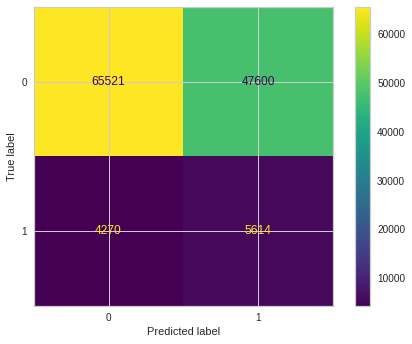

In [ ]:
y_pred = lgb_fOne.predict(X_test_smtomek)
print(classification_report(y_test_smtomek, y_pred))
cm = confusion_matrix(y_test_smtomek, y_pred, labels=lgb_fOne.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=lgb_fOne.classes_).plot()
plt.show()

In [ ]:
#importing and training the model
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight={0: 0.47, 1: 0.53})

In [ ]:
fone_scorer = make_scorer(fbeta_score,
                          beta=1,
                          greater_is_better = True,
                          pos_label=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = fone_scorer)
grid_clf_acc.fit(X_train_smtomek, y_train_smtomek)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_smtomek)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_smtomek,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_smtomek,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_smtomek,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_smtomek,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_smtomek,y_pred_acc)

Accuracy Score : 0.46089996341612127
Precision Score : 0.0917286487425115
Recall Score : 0.6413395386483205
F1 Score : 0.16050132928218763


array([[50354, 62767],
       [ 3545,  6339]])

In [ ]:
fone_scorer = make_scorer(fbeta_score,
                          beta=2,
                         
                          pos_label=0)

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
grid_clf_acc = GridSearchCV(lr, param_grid = grid_values,scoring = fone_scorer)
grid_clf_acc.fit(X_train_smtomek, y_train_smtomek)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test_smtomek)

# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test_smtomek,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_test_smtomek,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_test_smtomek,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_test_smtomek,y_pred_acc)))

#Logistic Regression (Grid Search) Confusion matrix
confusion_matrix(y_test_smtomek,y_pred_acc)

Accuracy Score : 0.46089996341612127
Precision Score : 0.0917286487425115
Recall Score : 0.6413395386483205
F1 Score : 0.16050132928218763


array([[50354, 62767],
       [ 3545,  6339]])

## Feature Importance

In [ ]:
pd.set_option('display.max_columns', None)
dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
0,100002,1,Cash loans,M,0,202500.0,406597.5,Unaccompanied,working,low_educ,not_married,0.018801,-9461,-637,NaN,other,1.0,2,2,10,0,0.0149,2.0,1,1.0,Closed,-874.00,108131.945625,NaN,NaN,NaN,NaN,-20.421053,0.0,9251.775,179055.00,0.00,-606.000000,24.000000,365243.0,-25.000000,-17.000000,Approved,XAP,New,15.000000,0.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,Family,working,high_educ,married,0.003541,-16765,-1188,NaN,other,2.0,1,1,11,0,0.0714,0.0,1,0.0,Closed,-1400.75,254350.125000,NaN,NaN,NaN,NaN,-7.000000,0.0,56553.990,484191.00,3442.50,-1305.000000,10.000000,365243.0,-1054.333333,-1047.333333,Approved,XAP,Refreshed,4.909091,0.0
2,100004,0,Revolving loans,M,0,67500.0,135000.0,Unaccompanied,working,low_educ,not_married,0.010032,-19046,-225,26.0,other,1.0,2,2,9,0,NaN,0.0,0,0.0,Closed,-867.00,94518.900000,NaN,NaN,NaN,NaN,-3.000000,0.0,5357.250,20106.00,4860.00,-815.000000,4.000000,365243.0,-724.000000,-714.000000,Approved,XAP,New,0.000000,0.0
3,100006,0,Cash loans,F,0,135000.0,312682.5,Unaccompanied,working,low_educ,married,0.008019,-19005,-3039,NaN,other,2.0,2,2,17,0,NaN,0.0,1,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,-19.375000,0.0,23651.175,291695.50,34840.17,-272.444444,23.000000,365243.0,182477.500000,182481.750000,Approved,XAP,Repeater,8.650000,0.0
4,100007,0,Cash loans,M,0,121500.0,513000.0,Unaccompanied,working,low_educ,not_married,0.028663,-19932,-3038,NaN,other,1.0,2,2,11,1,NaN,0.0,0,0.0,Closed,-1149.00,146250.000000,NaN,NaN,NaN,NaN,-6.320000,0.0,12278.805,166638.75,3390.75,-1222.833333,20.666667,365243.0,72136.200000,72143.800000,Approved,XAP,Repeater,11.666667,0.0


In [ ]:
from sklearn.inspection import permutation_importance

In [ ]:
pd.set_option('display.max_columns', None)
dataset.sample(1000)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_CITY_NOT_WORK_CITY,TOTALAREA_MODE,DEF_30_CNT_SOCIAL_CIRCLE,FLAG_DOCUMENT_3,AMT_REQ_CREDIT_BUREAU_YEAR,CREDIT_ACTIVE,DAYS_CREDIT,AMT_CREDIT_SUM,AMT_BALANCE,AMT_PAYMENT_CURRENT,SK_DPD_x,SK_DPD_DEF,DAYS_INSTALMENT_delay,AMT_INSTALMENT_delta,AMT_ANNUITY,AMT_CREDIT_y,AMT_DOWN_PAYMENT,DAYS_DECISION,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_LAST_DUE,DAYS_TERMINATION,NAME_CONTRACT_STATUS,CODE_REJECT_REASON,NAME_CLIENT_TYPE,CNT_INSTALMENT_FUTURE,SK_DPD_y
202398,334630,0,Revolving loans,M,0,337500.0,180000.0,Unaccompanied,working,low_educ,not_married,0.010643,-12588,-4989,NaN,NaN,1.0,2,2,15,1,0.0133,NaN,0,1.0,Active,-821.333333,4.708611e+05,NaN,NaN,NaN,NaN,-9.833333,0.000000,11623.882500,61013.250,13500.0,-1499.000000,6.000000,365243.000000,-1318.5,-1310.500000,Approved,XAP,New,2.428571,0.000000
224412,359922,0,Cash loans,F,0,90000.0,808650.0,Family,working,low_educ,married,0.006207,-18748,-6267,NaN,NaN,2.0,2,2,14,0,0.0491,0.0,1,0.0,Closed,-1277.833333,5.627138e+05,NaN,NaN,NaN,NaN,NaN,NaN,12520.125000,86584.500,4275.0,-2015.000000,8.000000,365243.000000,-1774.0,-1771.000000,Approved,XAP,New,NaN,NaN
85775,199530,0,Cash loans,F,2,157500.0,612612.0,Children,working,high_educ,other,0.020246,-14079,-3085,19.0,other,3.0,3,3,11,0,0.1439,0.0,1,3.0,Closed,-1425.583333,1.294880e+05,NaN,NaN,NaN,NaN,-5.826087,161.655652,24907.113000,334895.625,45000.9,-491.000000,17.600000,365243.000000,-757.0,-751.333333,Canceled,XAP,Repeater,23.681818,0.136364
175020,302817,0,Cash loans,M,2,225000.0,469147.5,Unaccompanied,working,low_educ,married,0.010032,-14629,-2302,NaN,other,4.0,2,2,6,0,0.2633,0.0,1,4.0,Closed,-214.000000,2.341980e+05,163514.83875,16312.5,0.000000,0.000000,-4.281250,0.000000,11256.197143,74993.850,2898.0,-523.000000,14.142857,304253.833333,121279.5,121283.333333,Approved,XAP,Repeater,8.529412,0.000000
144530,267587,0,Cash loans,M,0,157500.0,312768.0,Family,working,low_educ,married,0.018634,-21287,-1750,NaN,NaN,2.0,2,2,12,0,NaN,0.0,1,1.0,Active,-1311.250000,3.020625e+05,219871.25250,14175.0,0.666667,0.666667,-5.266667,-2420.109000,15720.795000,245271.375,1.8,-1007.750000,19.500000,273723.000000,90982.5,90986.250000,Approved,XAP,Repeater,23.548387,0.096774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82901,196151,0,Cash loans,F,0,76500.0,337500.0,Unaccompanied,working,low_educ,married,0.026392,-18466,-10863,NaN,NaN,2.0,2,2,18,0,NaN,0.0,1,0.0,Active,-768.000000,4.252077e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109594,227102,1,Cash loans,F,2,324000.0,755190.0,Unaccompanied,working,low_educ,married,0.016612,-11773,-1960,NaN,other,4.0,2,2,13,1,NaN,1.0,1,0.0,Active,-868.333333,2.110996e+05,NaN,NaN,NaN,NaN,NaN,NaN,9595.740000,78721.500,4549.5,-1446.666667,10.000000,365243.000000,-1146.0,-1139.333333,Approved,XAP,Repeater,NaN,NaN
143959,266922,0,Cash loans,M,0,135000.0,225000.0,Unaccompanied,working,low_educ,not_married,0.028663,-10704,-776,2.0,other,1.0,2,2,14,1,NaN,1.0,0,2.0,Closed,-524.333333,9.129470e+04,NaN,NaN,NaN,NaN,-12.222222,0.000000,4450.950000,21628.500,0.0,-265.333333,12.000000,365243.000000,365243.0,365243.000000,Refused,XAP,Repeater,8.000000,0.000000
95985,211437,0,Cash loans,F,0,450000.0,1792318.5,Unaccompanied,working,high_educ,married,0.046220,-11073,-572,NaN,other,2.0,1,1,13,0,NaN,0.0,1,2.0,Active,-956.250000,3.046500e+06,NaN,NaN,NaN,NaN,-15.454545,0.000000,43868.520000,536114.250,33169.5,-818.500000,17.000000,365243.000000,-99.0,-92.000000,Refused,LIMIT,Repeater,10.500000,0.000000


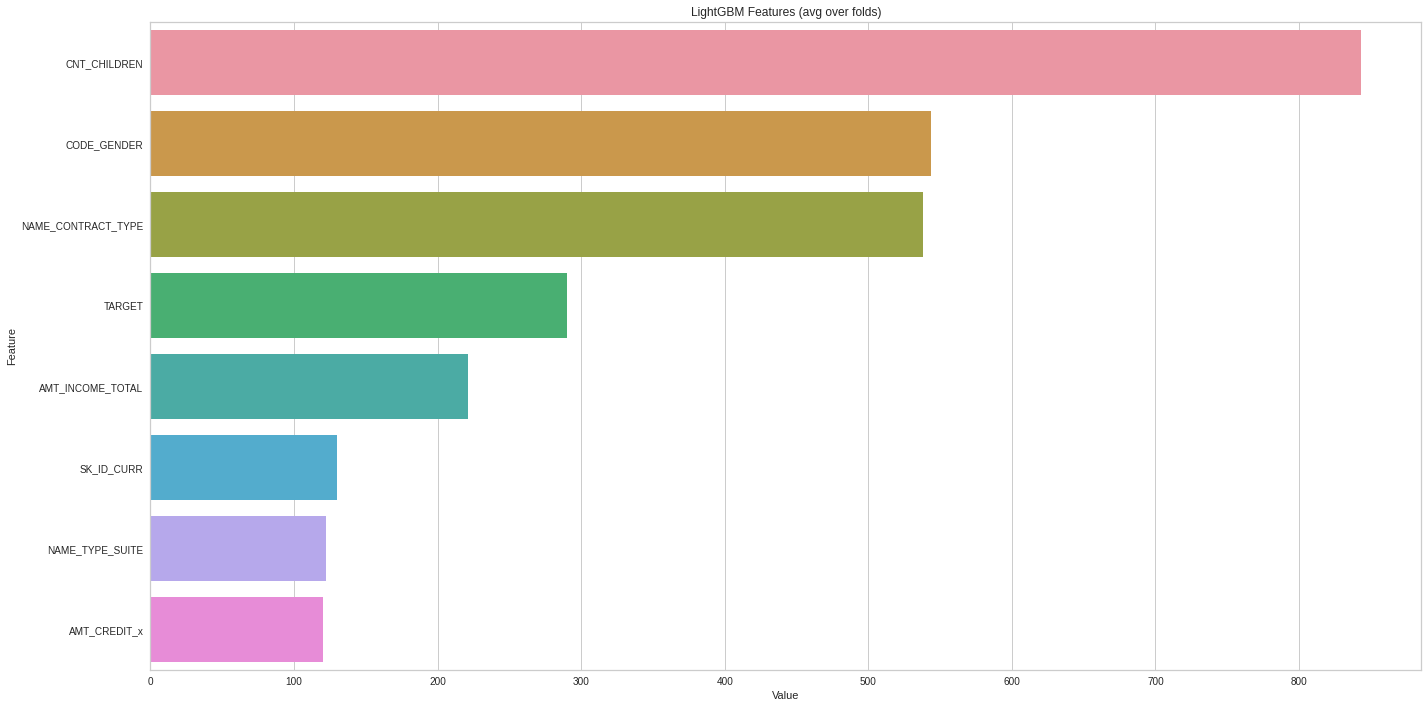

<Figure size 576x396 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sorted(zip(clf.feature_importances_, dataset.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(lgb_fOne.best_estimator_.feature_importances_,dataset.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

In [ ]:
pickle_out = open(PATH + "lgbm.pkl", "wb")
pickle.dump(lgb_fOne, pickle_out)
pickle_out.close()

pickle_out = open(PATH + "lr.pkl", "wb")
pickle.dump(grid_clf_acc, pickle_out)
pickle_out.close()

On va donc , dans le Notebook suivant, selectionner nos features importantes et ensuite réappliquer LightGBM dessus pour la mise en place de notre application.